NameError: name 'ax' is not defined

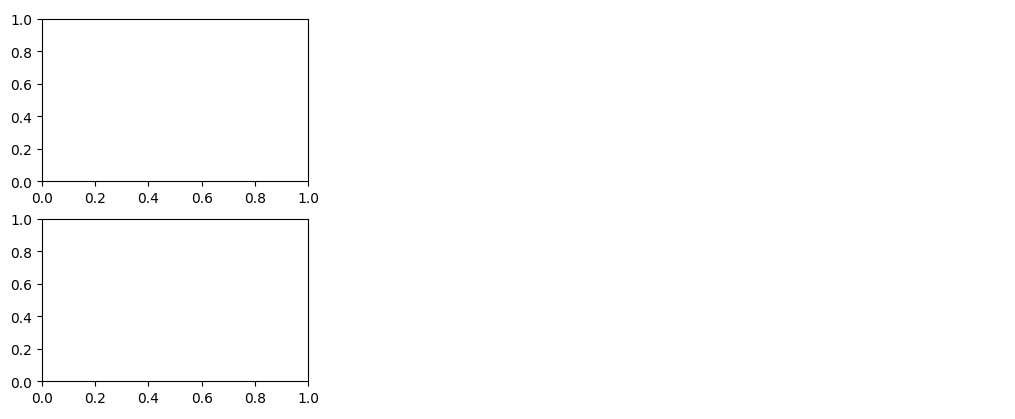

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def example_plot(ax, fontsize=12, hide_labels=False):
    pc = ax.pcolormesh(np.random.randn(30, 30), vmin=-2.5, vmax=2.5)
    if not hide_labels:
        ax.set_xlabel('x-label', fontsize=fontsize)
        ax.set_ylabel('y-label', fontsize=fontsize)
        ax.set_title('Title', fontsize=fontsize)
    return pc

np.random.seed(19680808)
# gridspec inside gridspec
fig = plt.figure(layout='constrained', figsize=(10, 4))
subfigs = fig.subfigures(1, 3, wspace=0.07)

for subplot in subfigs:
    subplot = subfigs[0].subplots(2, 1, sharey=True)
    subplot[0] = example_plot(ax)
    subsubplots = subplot[1].subplots(3, 3, sharey=True)
    for subsubplot in subsubplots:
        subsubplot = example_plot(ax)

axsLeft = subfigs[0].subplots(2, 1, sharey=True)
subfigs[0].set_facecolor('0.75')
for ax in axsLeft:
    pc = example_plot(ax)
subfigs[0].suptitle('Left plots', fontsize='x-large')
subfigs[0].colorbar(pc, shrink=0.6, ax=axsLeft, location='bottom')

axsRight = subfigs[1].subplots(3, 1, sharex=True)
for nn, ax in enumerate(axsRight):
    pc = example_plot(ax, hide_labels=True)
    if nn == 2:
        ax.set_xlabel('xlabel')
    if nn == 1:
        ax.set_ylabel('ylabel')

subfigs[1].set_facecolor('0.85')
subfigs[1].colorbar(pc, shrink=0.6, ax=axsRight)
subfigs[1].suptitle('Right plots', fontsize='x-large')

fig.suptitle('Figure suptitle', fontsize='xx-large')

plt.show()

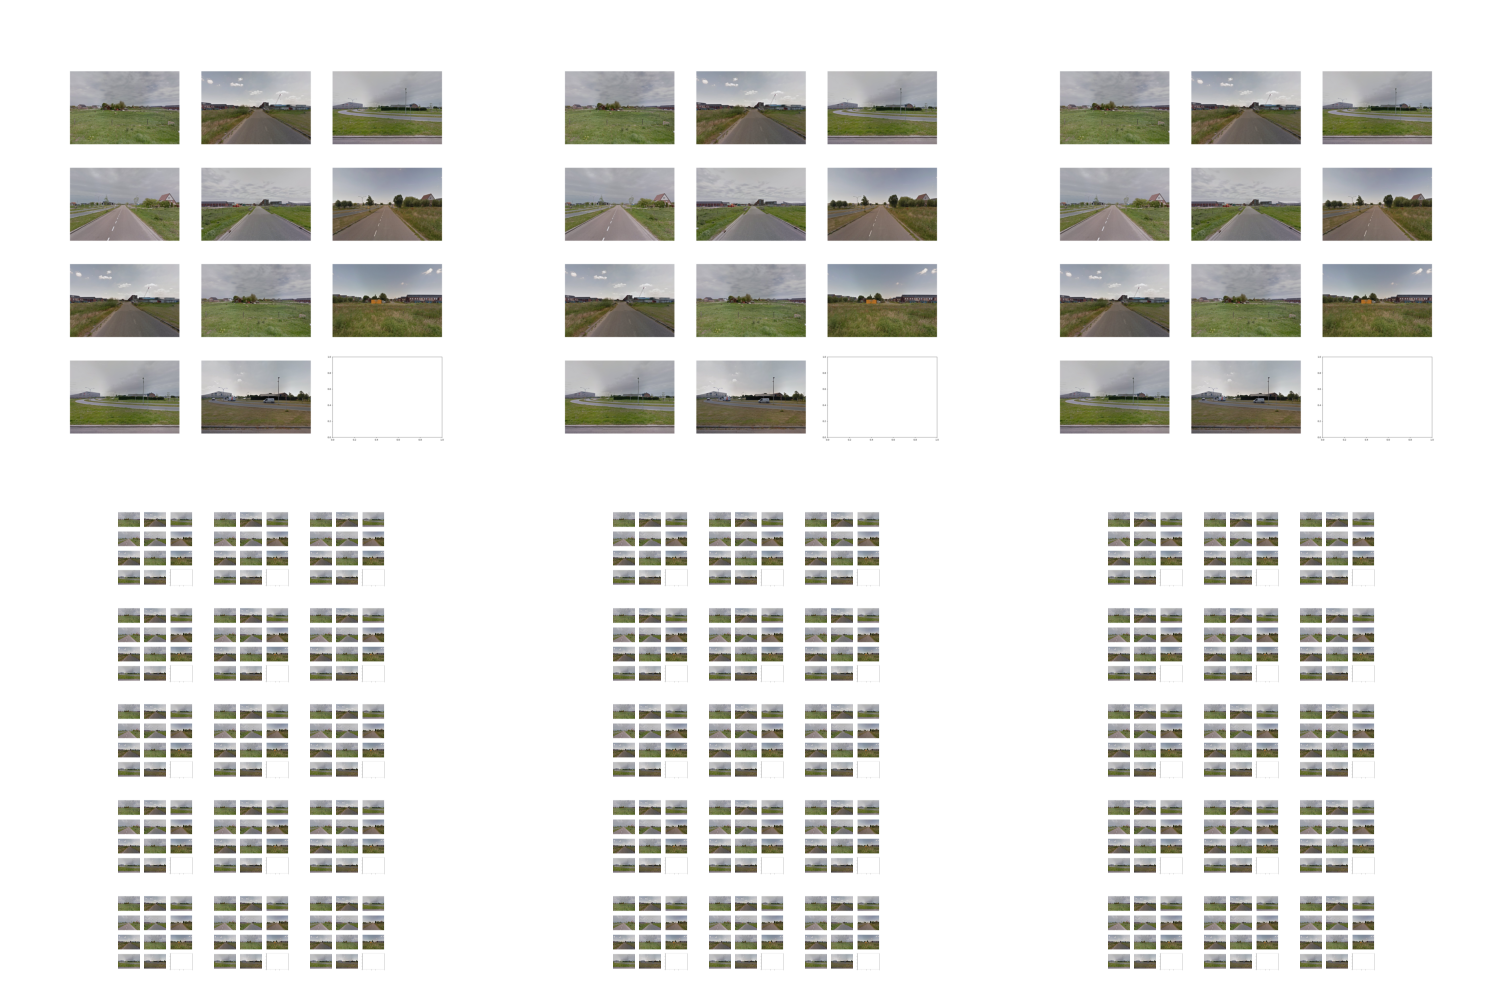

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

# Load the image
img = Image.open('TEST.png')

# Create a figure with 3 main columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over the 3 main columns
for i in range(3):
    # Top subplot: Display the image
    axs[0, i].imshow(img)
    axs[0, i].axis('off')  # Turn off axis

    # Bottom subplot: Create a grid of 3x5 with the image
    for row in range(5):
        for col in range(3):
            axs[1, i].imshow(img, extent=[col, col+1, row, row+1])
            axs[1, i].axis([0, 3, 0, 5])
            axs[1, i].axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

C:\Users\s161352\AppData\Local\Temp\ipykernel_8984\3854653627.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


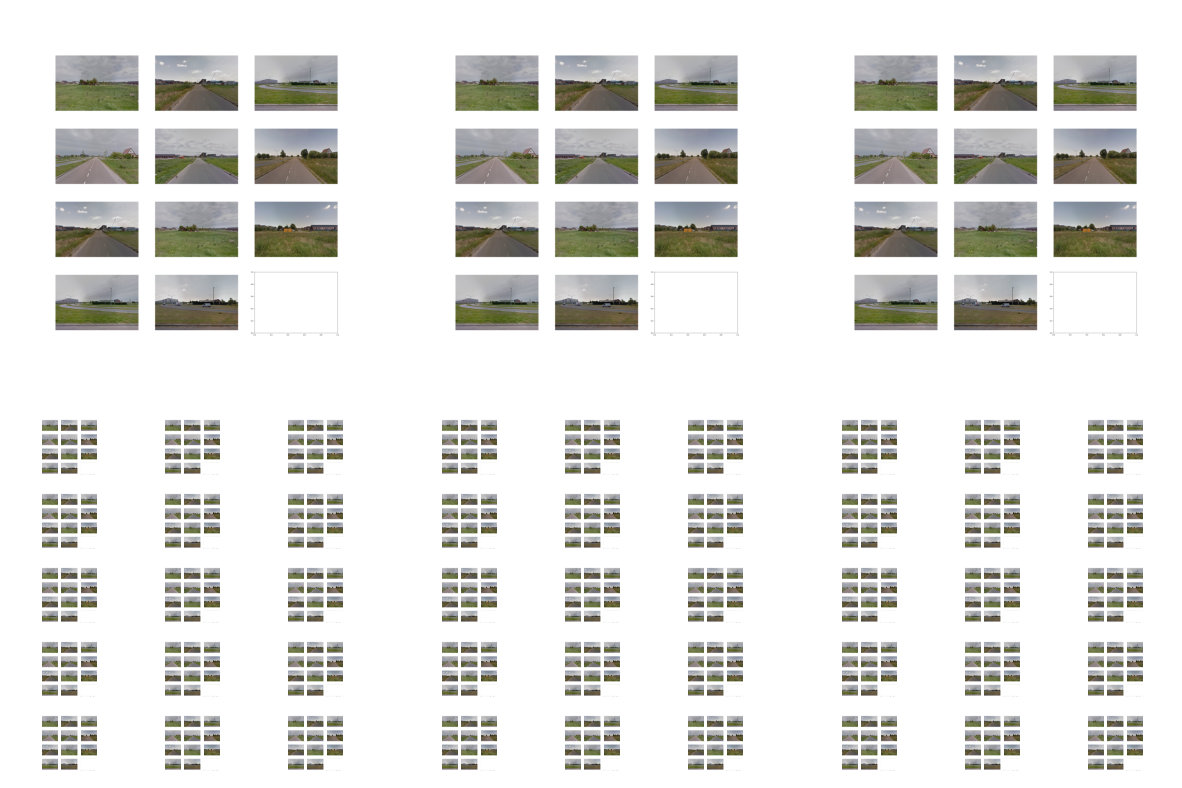

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image

# Load the image
img = Image.open('TEST.png')

# Create a figure
fig = plt.figure(figsize=(15, 10))

# Define the main 3-column layout
outer_grid = gridspec.GridSpec(1, 3, wspace=0.1, hspace=0.1)

# Iterate over the 3 main columns
for i in range(3):
    # Create a 1x2 grid for each main column
    inner_grid = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_grid[i], hspace=0.1)

    # Top subplot for the single image
    ax_top = plt.Subplot(fig, inner_grid[0])
    ax_top.imshow(img)
    ax_top.axis('off')
    fig.add_subplot(ax_top)

    # Bottom subplot for the grid of images
    ax_bottom = plt.Subplot(fig, inner_grid[1])
    ax_bottom.axis('off')
    fig.add_subplot(ax_bottom)

    # Create a nested 3x5 grid within the bottom subplot
    nested_grid = gridspec.GridSpecFromSubplotSpec(5, 3, subplot_spec=inner_grid[1], wspace=0.05, hspace=0.05)

    # Populate the nested grid with images
    for j in range(15):
        ax_nested = plt.Subplot(fig, nested_grid[j])
        ax_nested.imshow(img)
        ax_nested.axis('off')
        fig.add_subplot(ax_nested)

plt.tight_layout()
plt.show()

C:\Users\s161352\AppData\Local\Temp\ipykernel_8984\1873602643.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


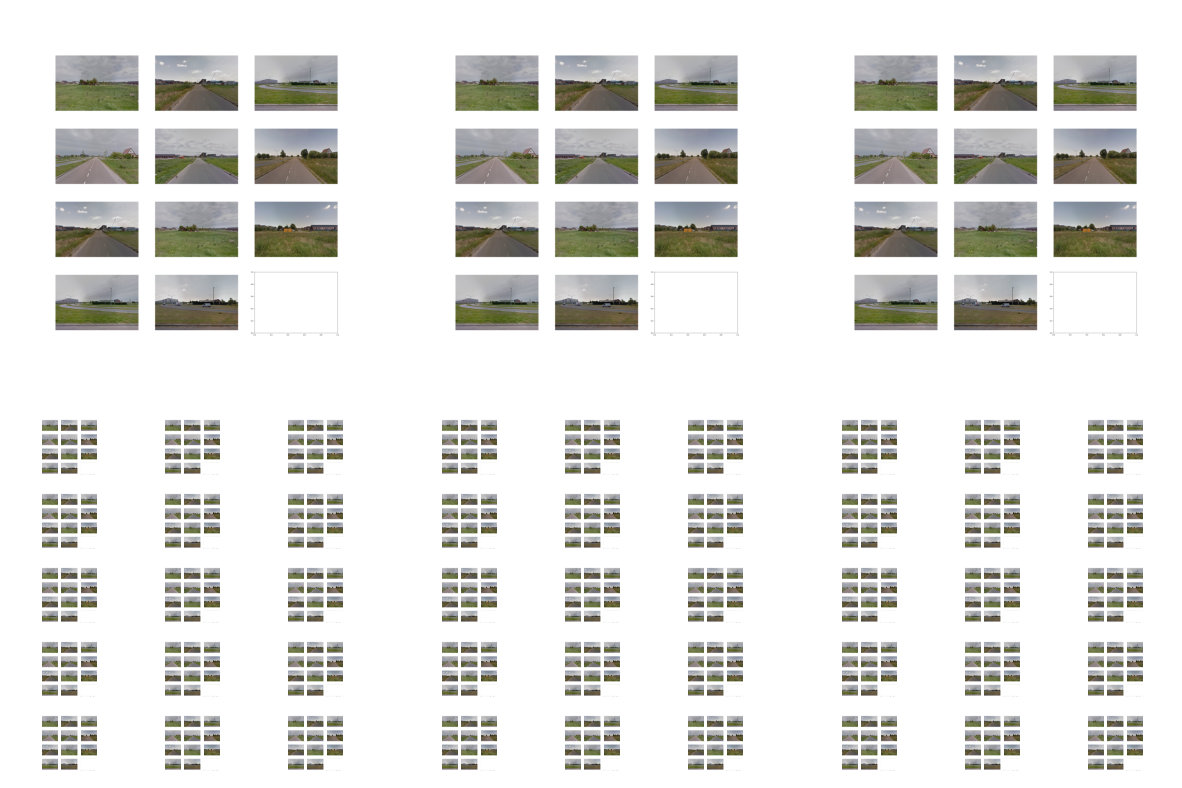

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image

def create_image_layout(main_columns, grid_rows, grid_cols, image_path):
    """
    Create a layout with specified number of main columns.
    Each main column has a top subplot with a single image, and a bottom subplot with a grid of images.

    :param main_columns: Number of main columns in the layout.
    :param grid_rows: Number of rows in each grid.
    :param grid_cols: Number of columns in each grid.
    :param image_path: Path to the image file.
    """
    # Load the image
    img = Image.open(image_path)

    # Create a figure
    fig = plt.figure(figsize=(5 * main_columns, 10))

    # Define the main layout
    outer_grid = gridspec.GridSpec(1, main_columns, wspace=0.1, hspace=0.1)

    # Iterate over the main columns
    for i in range(main_columns):
        # Create a 1x2 grid for each main column
        inner_grid = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_grid[i], hspace=0.1)

        # Top subplot for the single image
        ax_top = plt.Subplot(fig, inner_grid[0])
        ax_top.imshow(img)
        ax_top.axis('off')
        fig.add_subplot(ax_top)

        # Bottom subplot for the grid of images
        ax_bottom = plt.Subplot(fig, inner_grid[1])
        ax_bottom.axis('off')
        fig.add_subplot(ax_bottom)

        # Create a nested grid within the bottom subplot
        nested_grid = gridspec.GridSpecFromSubplotSpec(grid_rows, grid_cols, subplot_spec=inner_grid[1], wspace=0.05, hspace=0.05)

        # Populate the nested grid with images
        for j in range(grid_rows * grid_cols):
            ax_nested = plt.Subplot(fig, nested_grid[j])
            ax_nested.imshow(img)
            ax_nested.axis('off')
            fig.add_subplot(ax_nested)

    plt.tight_layout()
    plt.show()

# Example usage
create_image_layout(main_columns=3, grid_rows=5, grid_cols=3, image_path='TEST.png')

C:\Users\s161352\AppData\Local\Temp\ipykernel_20296\928101836.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.0)  # Adjust the padding between and around subplots


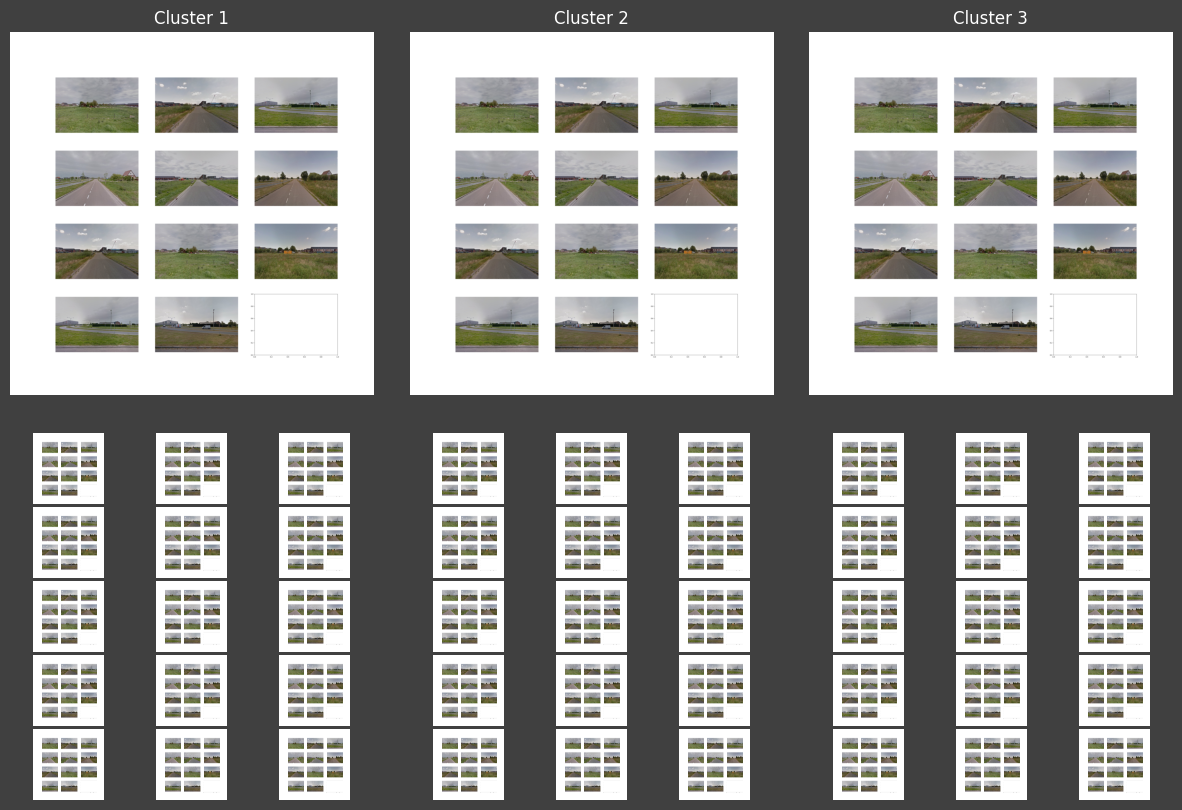

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image

def create_image_layout(main_columns, grid_rows, grid_cols, image_path):
    """
    Create a layout with specified number of main columns.
    Each main column has a top subplot with a single image, a title, and a bottom title showing the image path,
    with a lighter grey background around the top image, and a darker grey background around the grid.

    :param main_columns: Number of main columns in the layout.
    :param grid_rows: Number of rows in each grid.
    :param grid_cols: Number of columns in each grid.
    :param image_path: Path to the image file.
    """
    # Load the image
    img = Image.open(image_path)

    # Create a figure
    fig = plt.figure(figsize=(5 * main_columns, 10))
    fig.patch.set_facecolor('#404040')  # Set the background color of the figure

    # Define the main layout
    outer_grid = gridspec.GridSpec(1, main_columns, wspace=0.1, hspace=0.1)

    # Define background colors
    light_grey = '#D3D3D3'
    dark_grey =  'red'

    # Iterate over the main columns
    for i in range(main_columns):
        # Create a 1x2 grid for each main column
        inner_grid = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_grid[i], hspace=0.1)

        # Top subplot for the single image with a title and bottom title
        ax_top = plt.Subplot(fig, inner_grid[0])
        ax_top.imshow(img)
        ax_top.set_title(f"Cluster {i+1}", color='white')
        ax_top.set_xlabel(image_path, color='red')
        ax_top.axis('off')
        fig.add_subplot(ax_top)

        # Set the background color around the top image to light grey
        ax_top.set_facecolor(light_grey)
        ax_top.figure.patch.set_facecolor(light_grey)

        # Bottom subplot for the grid of images
        ax_bottom = plt.Subplot(fig, inner_grid[1])
        ax_bottom.axis('off')
        fig.add_subplot(ax_bottom)

        # Set the background color around the grid to dark grey
        ax_bottom.set_facecolor(dark_grey)
        ax_bottom.figure.patch.set_facecolor(dark_grey)

        # Create a nested grid within the bottom subplot
        nested_grid = gridspec.GridSpecFromSubplotSpec(grid_rows, grid_cols, subplot_spec=inner_grid[1], wspace=0.05, hspace=0.05)

        # Populate the nested grid with images
        for j in range(grid_rows * grid_cols):
            ax_nested = plt.Subplot(fig, nested_grid[j])
            ax_nested.imshow(img)
            ax_nested.axis('off')
            fig.add_subplot(ax_nested)

            # Set the background color of each nested subplot to dark grey
            ax_nested.set_facecolor(dark_grey)

    plt.tight_layout(pad=1.0)  # Adjust the padding between and around subplots
    plt.show()

# Example usage
create_image_layout(main_columns=3, grid_rows=5, grid_cols=3, image_path='TEST.png')